<a href="https://colab.research.google.com/github/SRegaard/Workshop-1./blob/main/project_example/ecocammer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Explanation of the Echo Chamber Simulation Code**

This Python script simulates how algorithm-driven recommendations on social media can create echo chambers, where users are repeatedly exposed to similar types of content based on their previous interactions. The model is structured as follows:



### 1. **User Preferences and Content Categories**
Users are initialized with predefined preferences for different content topics, representing their likelihood of engaging with certain subjects. These preferences serve as a baseline for determining how users interact with content over time.

### 2. **Recommendation System**
A simple recommendation algorithm suggests content based on the user’s previous engagements. If a user has interacted with a specific topic frequently, the algorithm is more likely to recommend similar content in the future. This mimics how many social media platforms personalize feeds to maximize engagement.

### 3. **User Interaction with Content**
For each time step in the simulation, users engage with recommended content based on their preferences. The more they interact with a certain category, the more likely they are to receive similar recommendations in the future. A small probability is assigned for users to engage with content outside their preferences to allow for occasional exploration.

### 4. **Tracking the Evolution of Content Exposure**
The simulation runs for multiple time steps, tracking how users' content exposure evolves over time. The results are visualized using line plots, illustrating how certain topics dominate a user’s content consumption while others fade away. This visually demonstrates the emergence of echo chambers, where exposure to new ideas becomes increasingly limited.

---

## **How the Model Can Be Made More Realistic**
While the current model effectively illustrates the echo chamber effect, several improvements can make it more representative of real-world recommendation systems:

### 1. **Introduce Diversity Mechanisms**
In reality, platforms sometimes introduce diversity mechanisms to prevent excessive repetition of content. A more sophisticated model could include a probability for the recommendation algorithm to introduce "exploration phases," where users are exposed to new content outside their usual preferences.

### 2. **Incorporate Social Influence**
Social media recommendations are often influenced by peer interactions. Adding a mechanism where users are influenced by the content their peers engage with would better reflect real-world social dynamics.

### 3. **Personalized Learning Algorithm**
Modern recommendation systems use machine learning models that continuously update based on user engagement patterns. Implementing reinforcement learning techniques (such as Multi-Armed Bandit models) could enhance the realism of the simulation.

### 4. **Fatigue and Frustration Factor**
Users do not engage with content indefinitely—overexposure to the same type of content can lead to boredom or frustration. A more advanced model could include a "saturation" factor, where users disengage if they see repetitive content too often, forcing the algorithm to diversify its recommendations.

### 5. **Comparison of Different Recommendation Strategies**
Instead of using a single recommendation approach, the model could compare multiple strategies, such as collaborative filtering (suggesting content based on similar users) versus content-based filtering (suggesting content based on past engagement).

### 6. **Real Data Integration**
For a more empirical study, the simulation could be enhanced by integrating real-world user interaction data, either from social media platforms or news recommendation systems, to observe actual echo chamber formation over time.

---

## **Conclusion**
This simulation provides a simplified yet insightful demonstration of how recommendation algorithms shape user engagement and contribute to echo chambers. By introducing additional mechanisms such as diversity strategies, social influence, and user fatigue, the model can be made significantly more realistic. This type of simulation can be useful for students and researchers studying the effects of algorithm-driven personalization in digital media environments.



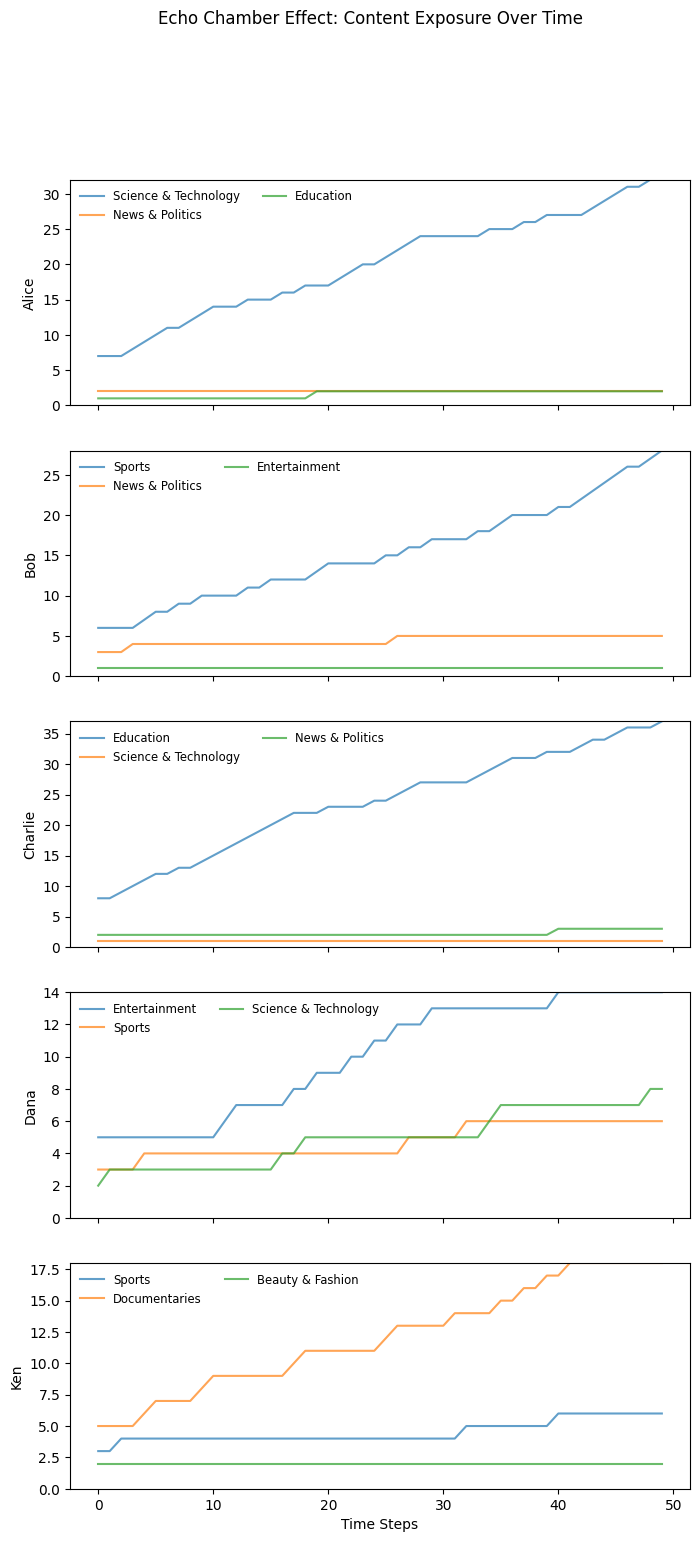

In [6]:
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# Categories available on the platform
topics = [
    "Music", "Film & Animation", "Gaming", "Entertainment", "News & Politics", "Sports",
    "Science & Technology", "Education", "Travel & Events", "Lifestyle & Vlogs", "Food & Drink",
    "Beauty & Fashion", "Documentaries"
]

# Corrected user preferences with proper topic names
users = {
    "Alice": {"Science & Technology": 0.7, "News & Politics": 0.2, "Education": 0.1},
    "Bob": {"Sports": 0.6, "News & Politics": 0.3, "Entertainment": 0.1},
    "Charlie": {"Education": 0.7, "Science & Technology": 0.1, "News & Politics": 0.2},
    "Dana": {"Entertainment": 0.5, "Sports": 0.3, "Science & Technology": 0.2},
    "Ken": {"Sports": 0.3, "Documentaries": 0.5, "Beauty & Fashion": 0.2},
}

# User browsing history (default to integers)
user_history = defaultdict(lambda: defaultdict(int))

# Initialize user history with some initial engagement
for user, preferences in users.items():
    for topic, weight in preferences.items():
        user_history[user][topic] = int(weight * 10)  # Prefill based on weight

# Function to recommend content

def recommend_content(user):
    history = user_history[user]
    if sum(history.values()) == 0:
        return random.choice(topics)  # If no history, pick randomly

    # 15% chance to explore a new topic
    if random.random() < 0.15:
        return random.choice(topics)

    return random.choices(list(history.keys()), weights=history.values())[0]

# Run simulation

time_steps = 50
engagement_data = {user: [] for user in users}

for _ in range(time_steps):
    for user, preferences in users.items():
        recommended = recommend_content(user)
        engagement_probability = preferences.get(recommended, 0.1)  # Small chance outside preference

        if random.random() < engagement_probability:
            user_history[user][recommended] += 1  # Reinforce engagement

        engagement_data[user].append(dict(user_history[user]))

# Plot results
fig, axs = plt.subplots(len(users), figsize=(8, 17), sharex=True)
fig.suptitle("Echo Chamber Effect: Content Exposure Over Time")

time_range = range(time_steps)
for idx, (user, history) in enumerate(engagement_data.items()):
    user_topics = users[user].keys()  # Only include topics relevant to the user
    topic_counts = {topic: [h.get(topic, 0) for h in history] for topic in user_topics}

    for topic, counts in topic_counts.items():
        axs[idx].plot(time_range, counts, label=topic, alpha=0.7)  # Add transparency for visibility

    axs[idx].set_ylabel(user)
    axs[idx].legend(loc="upper left", fontsize="small", frameon=False, ncol=2)  # Adjust legend position
    axs[idx].set_ylim(0, max(1, max(max(c) for c in topic_counts.values())))  # Ensure small values are visible

plt.xlabel("Time Steps")
plt.show()
